# Data Cleaning

## Import Dependencies 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

## Import Data

In [2]:
df = pd.read_excel('/Users/cenkyagkan/Desktop/OMM/7.Semester/Applied Data Analytics/Mobile.de/zsf_031021_mobile_data_1000_200000.xlsx')

In [3]:
df.head()

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16.950 € (Brutto),198.245 km,2.143 cm³,105 kW (143 PS),Diesel,Schaltgetriebe,-1,07/2017,3,4/5,Euro6,Van / Minibus,1,Unfallfrei
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60.490 € (Brutto),10.529 km,1.950 cm³,140 kW (190 PS),Diesel,Automatik,-1,05/2020,5,4/5,Euro6d,SUV / Geländewagen / Pickup,1,Unfallfrei
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24.990 € (Brutto),91.205 km,1.332 cm³,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1
3,Mercedes-Benz S 63 AMG COUPE 4MATIC+*360CAM*BU...,129900,50.696 km,3.982 cm³,450 kW (612 PS),Benzin,Automatik,-1,05/2018,4,2/3,Euro6,Sportwagen / Coupé,2,-1
4,Mercedes-Benz C 63 AMG S*KERAMIK*SCHMIDT*SCHAL...,79990,39.000 km,3.982 cm³,375 kW (510 PS),Benzin,Automatik,-1,09/2017,4,2/3,Euro6,Cabrio / Roadster,2,-1


In [4]:
df.tail()

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage
1410,Mercedes-Benz Mercedes Benz C63 AMG,66.500 € (Brutto),11.355 km,1.991 cm³,190 kW (258 PS),"Benzin, E10-geeignet",Automatik,2020,10/2020,5,4/5,Euro6d-TEMP,Limousine,1,-1
1411,Mercedes-Benz Mercedes V 250 d Avangard Edition,42.849 € (Brutto),60.105 km,2.143 cm³,150 kW (204 PS),Diesel,Automatik,-1,09/2018,5,4/5,Euro6c,SUV / Geländewagen / Pickup,1,-1
1412,Mercedes-Benz Mercedes-Benz,54.849 € (Brutto),46.419 km,2.925 cm³,250 kW (340 PS),Diesel,Automatik,-1,03/2020,5,4/5,Euro6d-TEMP,Kombi,1,Unfallfrei
1413,Mercedes-Benz E 2200 d Avantgarde NIGHT 360° L...,46.849 € (Brutto),52.553 km,2.987 cm³,190 kW (258 PS),Diesel,Automatik,-1,01/2017,5,4/5,Euro6,SUV / Geländewagen / Pickup,-1,-1
1414,Mercedes-Benz CLA 250 Shooting Brake 4Matic AM...,49.849 € (Brutto),72.820 km,2.996 cm³,270 kW (367 PS),Benzin,Automatik,-1,01/2019,5,4/5,Euro6d-TEMP,SUV / Geländewagen / Pickup,1,-1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   carname             1415 non-null   object
 1   price               1415 non-null   object
 2   milage              1415 non-null   object
 3   hubraum             1415 non-null   object
 4   power               1415 non-null   object
 5   fuel_type           1415 non-null   object
 6   transmission        1415 non-null   object
 7   construction_year   1415 non-null   int64 
 8   first_registration  1415 non-null   object
 9   num_seats           1415 non-null   int64 
 10  num_doors           1415 non-null   object
 11  emission_class      1415 non-null   object
 12  car_type            1415 non-null   object
 13  num_owners          1415 non-null   int64 
 14  damage              1415 non-null   object
dtypes: int64(3), object(12)
memory usage: 165.9+ KB


### Clean Column "price"

In [6]:
#Alle Zeilen entfernen, bei denen kein Preis vorhanden ist
df = df[df['price'] != '-1']

In [7]:
df.price

0       16.950 € (Brutto)
1       60.490 € (Brutto)
2       24.990 € (Brutto)
3                  129900
4                   79990
              ...        
1410    66.500 € (Brutto)
1411    42.849 € (Brutto)
1412    54.849 € (Brutto)
1413    46.849 € (Brutto)
1414    49.849 € (Brutto)
Name: price, Length: 1415, dtype: object

In [8]:
# Zwei Datentypen (int, str) in der Spalte "price"
df.price.apply(type).value_counts()

<class 'str'>    757
<class 'int'>    658
Name: price, dtype: int64

In [9]:
df_str = df[df.price.apply(type) == str]
df_int = df[df.price.apply(type) == int]

In [10]:
# Entfernen von ., € und Brutto
df_str['price'] = df_str['price'].apply(lambda x: float(x.lower().replace('(brutto)', '').replace('.','').replace('€','')))
df_int.price = df_int.price.astype(float)
df_new = pd.concat([df_str, df_int], axis=0)

<ipython-input-10-842851fea67b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_str['price'] = df_str['price'].apply(lambda x: float(x.lower().replace('(brutto)', '').replace('.','').replace('€','')))
/Users/cenkyagkan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df_new

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198.245 km,2.143 cm³,105 kW (143 PS),Diesel,Schaltgetriebe,-1,07/2017,3,4/5,Euro6,Van / Minibus,1,Unfallfrei
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10.529 km,1.950 cm³,140 kW (190 PS),Diesel,Automatik,-1,05/2020,5,4/5,Euro6d,SUV / Geländewagen / Pickup,1,Unfallfrei
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91.205 km,1.332 cm³,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1
5,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84.925 km,1.595 cm³,115 kW (156 PS),Benzin,Automatik,-1,01/2017,4,2/3,Euro6,Cabrio / Roadster,2,-1
7,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91.205 km,1.332 cm³,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Mercedes-Benz S -Klasse Lim. S 350 d L AMG,44500.0,115.000 km,-1,295 kW (401 PS),Benzin,Automatik,-1,08/2017,-1,-1,-1,Limousine,-1,-1
1406,Mercedes-Benz Vito 119 CDI Tourer Select 4-Mat...,36000.0,66.000 km,-1,280 kW (381 PS),Benzin,Automatik,-1,05/2017,-1,-1,-1,Sportwagen / Coupé,-1,-1
1407,Mercedes-Benz Vito Tourer 116 CDI Lang BlueTEC...,33900.0,35.000 km,-1,143 kW (194 PS),Diesel,Automatik,-1,07/2017,-1,4/5,Euro6d,Limousine,1,Unfallfrei
1408,Mercedes-Benz AMG GT 63 S 4Matic+,78000.0,55.000 km,3.982 cm³,350 kW (476 PS),"Benzin, E10-geeignet",Automatik,-1,07/2017,2,2/3,Euro6c,Sportwagen / Coupé,1,-1


### Create Modelname from Carname

In [12]:
def make_car_model(x):
    xl = x.lower()
    if 'a-klasse' in xl or 'a klasse' in xl or ' A ' in x or 'A1' in x or 'A2' in x or 'A4' in x:
        return 'A-Klasse'
    
    elif 'b-klasse' in xl or 'b klasse' in xl or ' B ' in x or 'B1' in x or 'B2' in x:
        return 'B-Klasse'
    
    elif 'c-klasse' in xl or 'c klasse' in xl or ' c ' in xl or 'c1' in xl or 'c2' in xl or 'c3' in xl:
        return 'C-Klasse'
    
    elif 'e-klasse' in xl or 'e klasse' in xl or ' E ' in x or 'e2' in xl or 'e3' in xl:
        return 'E-Klasse'
    
    elif 's-klasse' in xl or 's klasse' in xl or ' S ' in x:
        return 'S-Klasse'
    
    elif 'g-klasse' in xl or 'g klasse' in xl or ' G ' in x:
        return 'G-Klasse'
    
    elif 'm-klasse' in xl or 'm klasse' in xl or 'ML' in x or 'ml' in xl:
        return 'M-Klasse'
    
    elif 'x-klasse' in xl or 'x klasse' in xl:
        return 'X-Klasse'
    
    elif 'r-klasse' in xl or 'r klasse' in xl or ' r ' in xl:
        return 'R-Klasse'
    
    elif 'v-klasse' in xl or 'v klasse' in xl or ' v ' in xl or 'viano' in xl:
        return 'V-Klasse'
    
    elif 'marco polo' in xl or 'marco' in xl or 'polo' in xl:
        return 'MarcoPolo'
    
    elif 'cla' in xl:
        return 'CLA'
    
    elif 'clc' in xl:
        return 'CLC'
    
    elif 'clk' in xl:
        return 'CLK'
    
    elif 'cl' in xl:
        return 'CL'
    
    elif 'cls' in xl:
        return 'CLS'
    
    elif 'sl' in xl:
        return 'SL'
    
    elif 'slc' in xl:
        return 'SLC'
    
    elif 'slk' in xl:
        return 'SLK'
    
    elif 'slr' in xl:
        return 'SLR'
    
    elif 'sls' in xl:
        return 'SLS'
    
    elif 'gla' in xl:
        return 'GLA'
    
    elif 'glb' in xl:
        return 'GLB'
    
    elif 'glc' in xl:
        return 'GLC'
    
    elif 'glk' in xl:
        return 'GLK'
    
    elif 'gle' in xl:
        return 'GLE'
    
    elif 'gls' in xl:
        return 'GLS'
    
    elif 'gl' in xl:
        return 'GL'
    
    elif 'GT' in x:
        return 'GT'
    
    elif 'vaneo' in xl or 'citan' in xl:
        return 'Vaneo'
    
    elif 'vito' in xl:
        return 'Vito'
    
    elif 'sprinter' in xl:
        return 'Sprinter'
    
    else:
        return 'OTHER'

In [13]:
df_new.carname.apply(type).value_counts()
df_new[df_new.carname.apply(type) == int]
df_new = df_new.drop(660)

In [14]:
df_new['Model'] = df_new['carname'].apply(make_car_model)

In [15]:
df_new

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage,Model
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198.245 km,2.143 cm³,105 kW (143 PS),Diesel,Schaltgetriebe,-1,07/2017,3,4/5,Euro6,Van / Minibus,1,Unfallfrei,Sprinter
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10.529 km,1.950 cm³,140 kW (190 PS),Diesel,Automatik,-1,05/2020,5,4/5,Euro6d,SUV / Geländewagen / Pickup,1,Unfallfrei,GLB
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91.205 km,1.332 cm³,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse
5,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84.925 km,1.595 cm³,115 kW (156 PS),Benzin,Automatik,-1,01/2017,4,2/3,Euro6,Cabrio / Roadster,2,-1,C-Klasse
7,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91.205 km,1.332 cm³,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Mercedes-Benz S -Klasse Lim. S 350 d L AMG,44500.0,115.000 km,-1,295 kW (401 PS),Benzin,Automatik,-1,08/2017,-1,-1,-1,Limousine,-1,-1,S-Klasse
1406,Mercedes-Benz Vito 119 CDI Tourer Select 4-Mat...,36000.0,66.000 km,-1,280 kW (381 PS),Benzin,Automatik,-1,05/2017,-1,-1,-1,Sportwagen / Coupé,-1,-1,Vito
1407,Mercedes-Benz Vito Tourer 116 CDI Lang BlueTEC...,33900.0,35.000 km,-1,143 kW (194 PS),Diesel,Automatik,-1,07/2017,-1,4/5,Euro6d,Limousine,1,Unfallfrei,Vito
1408,Mercedes-Benz AMG GT 63 S 4Matic+,78000.0,55.000 km,3.982 cm³,350 kW (476 PS),"Benzin, E10-geeignet",Automatik,-1,07/2017,2,2/3,Euro6c,Sportwagen / Coupé,1,-1,S-Klasse


### Clean column "milage"

In [16]:
df_new['milage'] = df_new['milage'].apply(lambda x: float(x.lower().replace('km', '').replace('.','')))

### Clean column "hubraum"

In [17]:
df_str = df_new[df_new.hubraum.apply(type) == str]
df_int = df_new[df_new.hubraum.apply(type) == int]

In [18]:
df_int['hubraum'] = df_int['hubraum'].replace(-1, np.nan)
df_str['hubraum'] = df_str['hubraum'].str.replace(' cm³', '')
df_str['hubraum'] = df_str['hubraum'].astype(float)
df_new = pd.concat([df_str, df_int], axis=0)

<ipython-input-18-d1240cbb6fbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int['hubraum'] = df_int['hubraum'].replace(-1, np.nan)
<ipython-input-18-d1240cbb6fbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_str['hubraum'] = df_str['hubraum'].str.replace(' cm³', '')
<ipython-input-18-d1240cbb6fbc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [19]:
df_new

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage,Model
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198245.0,2.143,105 kW (143 PS),Diesel,Schaltgetriebe,-1,07/2017,3,4/5,Euro6,Van / Minibus,1,Unfallfrei,Sprinter
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10529.0,1.950,140 kW (190 PS),Diesel,Automatik,-1,05/2020,5,4/5,Euro6d,SUV / Geländewagen / Pickup,1,Unfallfrei,GLB
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse
5,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84925.0,1.595,115 kW (156 PS),Benzin,Automatik,-1,01/2017,4,2/3,Euro6,Cabrio / Roadster,2,-1,C-Klasse
7,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Mercedes-Benz S 500 4M Lim lang AMG Nightp. PD...,15500.0,375000.0,NaN,110 kW (150 PS),Diesel,Automatik,-1,02/2017,-1,-1,-1,Limousine,-1,-1,S-Klasse
1405,Mercedes-Benz S -Klasse Lim. S 350 d L AMG,44500.0,115000.0,NaN,295 kW (401 PS),Benzin,Automatik,-1,08/2017,-1,-1,-1,Limousine,-1,-1,S-Klasse
1406,Mercedes-Benz Vito 119 CDI Tourer Select 4-Mat...,36000.0,66000.0,NaN,280 kW (381 PS),Benzin,Automatik,-1,05/2017,-1,-1,-1,Sportwagen / Coupé,-1,-1,Vito
1407,Mercedes-Benz Vito Tourer 116 CDI Lang BlueTEC...,33900.0,35000.0,NaN,143 kW (194 PS),Diesel,Automatik,-1,07/2017,-1,4/5,Euro6d,Limousine,1,Unfallfrei,Vito


### Clean column power PS

In [20]:
df_new.power.apply(type).value_counts()
df_new[df_new.power.apply(type) == int]
df_new['power'] = df_new['power'].replace(-1, np.nan)
df_new['power'] =  df_new['power'].astype(str)

In [21]:
df_new.info()
df_new.power.apply(type).value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1409
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carname             1414 non-null   object 
 1   price               1414 non-null   float64
 2   milage              1414 non-null   float64
 3   hubraum             1085 non-null   float64
 4   power               1414 non-null   object 
 5   fuel_type           1414 non-null   object 
 6   transmission        1414 non-null   object 
 7   construction_year   1414 non-null   int64  
 8   first_registration  1414 non-null   object 
 9   num_seats           1414 non-null   int64  
 10  num_doors           1414 non-null   object 
 11  emission_class      1414 non-null   object 
 12  car_type            1414 non-null   object 
 13  num_owners          1414 non-null   int64  
 14  damage              1414 non-null   object 
 15  Model               1414 non-null   object 
dtypes: flo

<class 'str'>    1414
Name: power, dtype: int64

In [22]:
df_new['power_ps'] = df_new['power'].apply(lambda x: x.lower().replace('(', '').split()[2] if x != "nan" else None)

In [23]:
df_new

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage,Model,power_ps
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198245.0,2.143,105 kW (143 PS),Diesel,Schaltgetriebe,-1,07/2017,3,4/5,Euro6,Van / Minibus,1,Unfallfrei,Sprinter,143
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10529.0,1.950,140 kW (190 PS),Diesel,Automatik,-1,05/2020,5,4/5,Euro6d,SUV / Geländewagen / Pickup,1,Unfallfrei,GLB,190
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse,136
5,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84925.0,1.595,115 kW (156 PS),Benzin,Automatik,-1,01/2017,4,2/3,Euro6,Cabrio / Roadster,2,-1,C-Klasse,156
7,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Mercedes-Benz S 500 4M Lim lang AMG Nightp. PD...,15500.0,375000.0,NaN,110 kW (150 PS),Diesel,Automatik,-1,02/2017,-1,-1,-1,Limousine,-1,-1,S-Klasse,150
1405,Mercedes-Benz S -Klasse Lim. S 350 d L AMG,44500.0,115000.0,NaN,295 kW (401 PS),Benzin,Automatik,-1,08/2017,-1,-1,-1,Limousine,-1,-1,S-Klasse,401
1406,Mercedes-Benz Vito 119 CDI Tourer Select 4-Mat...,36000.0,66000.0,NaN,280 kW (381 PS),Benzin,Automatik,-1,05/2017,-1,-1,-1,Sportwagen / Coupé,-1,-1,Vito,381
1407,Mercedes-Benz Vito Tourer 116 CDI Lang BlueTEC...,33900.0,35000.0,NaN,143 kW (194 PS),Diesel,Automatik,-1,07/2017,-1,4/5,Euro6d,Limousine,1,Unfallfrei,Vito,194


### Clean column power KW

In [24]:
df_new['power_kw'] = df_new['power'].apply(lambda x: x.lower().replace('(', '').split()[0] if x != "nan" else None)

### Clean column fuel_type

In [25]:
df_new.fuel_type.apply(type).value_counts()

<class 'str'>    1407
<class 'int'>       7
Name: fuel_type, dtype: int64

In [26]:
df_new['fuel_type'] = df_new['fuel_type'].astype(str)

In [27]:
def fueltype(x):
    if x == '-1':
        
        return np.nan
    else:
        return x.split()[0].replace(',', '')

In [28]:
df_new['fuel_type'] = df_new['fuel_type'].apply(fueltype)

### Clean column transmission

<AxesSubplot:>

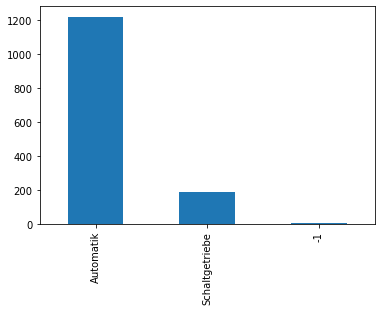

In [29]:
df_new['transmission'].value_counts().plot(kind='bar')

In [30]:
df_new['transmission'] = df_new['transmission'].replace(-1, np.nan)

In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1409
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carname             1414 non-null   object 
 1   price               1414 non-null   float64
 2   milage              1414 non-null   float64
 3   hubraum             1085 non-null   float64
 4   power               1414 non-null   object 
 5   fuel_type           1407 non-null   object 
 6   transmission        1406 non-null   object 
 7   construction_year   1414 non-null   int64  
 8   first_registration  1414 non-null   object 
 9   num_seats           1414 non-null   int64  
 10  num_doors           1414 non-null   object 
 11  emission_class      1414 non-null   object 
 12  car_type            1414 non-null   object 
 13  num_owners          1414 non-null   int64  
 14  damage              1414 non-null   object 
 15  Model               1414 non-null   object 
 16  power_

### Calculate Age of the Car from frist_registration

In [32]:
def car_age(x):
    year = float(x.split('/')[1])
    month = float(x.split('/')[0])
    age = 2021.83 - year - (month/12.0)
    return age

In [33]:
df_new['age'] = df_new['first_registration'].apply(car_age)

### Clean column num_seats

In [34]:
df_new['num_seats'] = df_new['num_seats'].apply(lambda x: str(x) if x != -1 else np.nan)

<AxesSubplot:>

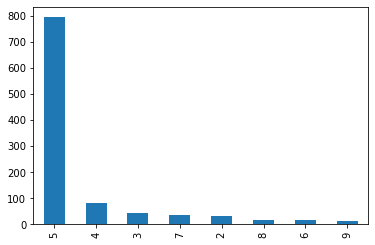

In [35]:
df_new['num_seats'].value_counts().plot(kind='bar')

In [36]:
df_new.loc[df['num_seats'] == 8]

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage,Model,power_ps,power_kw,age
146,"Mercedes-Benz C 220 d T AMG Line, Night-P., DI...",29850.0,39000.0,1.598,84 kW (114 PS),Diesel,Schaltgetriebe,-1,12/2018,8,4/5,Euro6,Van / Minibus,1,-1,C-Klasse,114,84,2.830000
148,Mercedes-Benz A 180 Kompaktlimousine DAB+PROGR...,29850.0,39000.0,1.598,84 kW (114 PS),Diesel,Schaltgetriebe,-1,12/2018,8,4/5,Euro6,Van / Minibus,1,-1,A-Klasse,114,84,2.830000
152,Mercedes-Benz E350d ALL-TERRAiN|PANO|NAPPA|DiS...,39980.0,77700.0,2.143,140 kW (190 PS),Diesel,Automatik,2017,03/2018,8,4/5,Euro6,Van / Minibus,1,Unfallfrei,E-Klasse,190,140,3.580000
178,Mercedes-Benz E 220d T 4Matic ACC*AHK*HeadUp*K...,37990.0,120925.0,2.143,120 kW (163 PS),Diesel,Automatik,2018,03/2018,8,4/5,Euro6,Andere,2,-1,E-Klasse,163,120,3.580000
265,Mercedes-Benz V 250 Avantgarde kompakt 4Matic ...,24880.0,99850.0,2.143,100 kW (136 PS),Diesel,Automatik,-1,04/2018,8,4/5,Euro6,Van / Minibus,1,Unfallfrei,V-Klasse,136,100,3.496667
487,Mercedes-Benz C 200 Coupe AMG Line - EQ Boost,26900.0,41000.0,2.143,140 kW (190 PS),Diesel,Automatik,2018,03/2018,8,4/5,-1,Andere,-1,-1,C-Klasse,190,140,3.580000
788,Mercedes-Benz GLC 300 e 4M Pano+AHK+LED+Kamera...,62950.0,28726.0,1.950,176 kW (239 PS),Diesel,Automatik,-1,08/2020,8,4/5,Euro6d-TEMP,"Van / Minibus, Jahreswagen",1,-1,GLC,239,176,1.163333
1027,Mercedes-Benz E 200 9G-TRONIC +NAVI+W213+Rückf...,19900.0,255529.0,2.143,120 kW (163 PS),Diesel,Schaltgetriebe,-1,05/2017,8,4/5,Euro6,Van / Minibus,1,Unfallfrei,E-Klasse,163,120,4.413333
1075,Mercedes-Benz Kasten 111 CDI FWD lang Klima PD...,22000.0,232500.0,2.143,120 kW (163 PS),Diesel,Automatik,-1,06/2017,8,4/5,Euro6,Van / Minibus,1,Unfallfrei,OTHER,163,120,4.330000
1127,Mercedes-Benz Vito 116 CDI Extralang LED/Navi/...,20900.0,216682.0,2.143,120 kW (163 PS),Diesel,Schaltgetriebe,-1,06/2017,8,4/5,Euro6,Van / Minibus,1,Unfallfrei,Vito,163,120,4.330000


### Clean column num_doors

In [37]:
df_new['num_doors'] = df_new['num_doors'].apply(lambda x: x if x != -1 else np.nan)

In [38]:
df_new

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage,Model,power_ps,power_kw,age
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198245.0,2.143,105 kW (143 PS),Diesel,Schaltgetriebe,-1,07/2017,3,4/5,Euro6,Van / Minibus,1,Unfallfrei,Sprinter,143,105,4.246667
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10529.0,1.950,140 kW (190 PS),Diesel,Automatik,-1,05/2020,5,4/5,Euro6d,SUV / Geländewagen / Pickup,1,Unfallfrei,GLB,190,140,1.413333
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse,136,100,2.496667
5,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84925.0,1.595,115 kW (156 PS),Benzin,Automatik,-1,01/2017,4,2/3,Euro6,Cabrio / Roadster,2,-1,C-Klasse,156,115,4.746667
7,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d-TEMP,Limousine,1,-1,A-Klasse,136,100,2.496667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Mercedes-Benz S 500 4M Lim lang AMG Nightp. PD...,15500.0,375000.0,NaN,110 kW (150 PS),Diesel,Automatik,-1,02/2017,NaN,NaN,-1,Limousine,-1,-1,S-Klasse,150,110,4.663333
1405,Mercedes-Benz S -Klasse Lim. S 350 d L AMG,44500.0,115000.0,NaN,295 kW (401 PS),Benzin,Automatik,-1,08/2017,NaN,NaN,-1,Limousine,-1,-1,S-Klasse,401,295,4.163333
1406,Mercedes-Benz Vito 119 CDI Tourer Select 4-Mat...,36000.0,66000.0,NaN,280 kW (381 PS),Benzin,Automatik,-1,05/2017,NaN,NaN,-1,Sportwagen / Coupé,-1,-1,Vito,381,280,4.413333
1407,Mercedes-Benz Vito Tourer 116 CDI Lang BlueTEC...,33900.0,35000.0,NaN,143 kW (194 PS),Diesel,Automatik,-1,07/2017,NaN,4/5,Euro6d,Limousine,1,Unfallfrei,Vito,194,143,4.246667


### Clean column emission_class

In [39]:
df_new['emission_class'] = df_new['emission_class'].apply(lambda x: x if x != -1 else np.nan)

In [40]:
df_new['emission_class'] = df_new['emission_class'].replace('Euro6d-TEMP', 'Euro6d')

<AxesSubplot:>

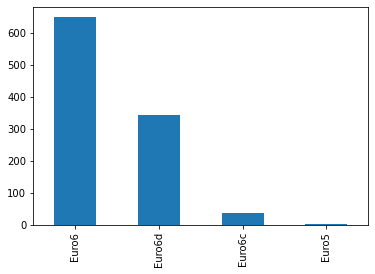

In [41]:
df_new['emission_class'].value_counts().plot(kind='bar')

### Clean column car_type

In [42]:
def simplify_cartype(x):
    xl = x.lower()
    xl = xl.replace(',','')
    xl = xl.replace('tageszulassung', '').replace('vorführfahrzeug', '')
    if 'suv' in xl:
        return 'suv'
    elif 'van' in xl or 'minibus' in xl:
        return 'van'
    elif 'cabrio' in xl or 'roadster' in xl:
        return 'cabrio'
    elif 'sportwagen' in xl or 'coup' in xl:
        return 'sport'
    elif 'limousine' in xl:
        return 'limousine'
    elif 'kombi' in xl:
        return 'kombi'
    elif 'kleinwagen' in xl:
        return 'kleinwagen'
    elif 'andere' in xl:
        return 'andere'
    else:
        return xl

In [43]:
df_new['car_type'] = df_new['car_type'].apply(simplify_cartype)

### Clean column num_owners

In [44]:
df_new['num_owners'] = df_new['num_owners'].apply(lambda x: str(x) if x != -1 else np.nan)

### Clean column damage

In [45]:
df_new['damage'] = df_new['damage'].astype(str)

In [46]:
def damage(x):
    xl = x.lower()
    if 'repariert' in xl:
        return 'repariert'
    elif 'unfallfrei' in xl:
        return 'unfallfrei'
    else:
        return np.nan

In [47]:
df_new.fuel_type.apply(type).value_counts()

<class 'str'>      1407
<class 'float'>       7
Name: fuel_type, dtype: int64

In [48]:
df_new['schaden'] = df_new['damage'].apply(damage)

In [49]:
df_new

,carname,price,milage,hubraum,power,fuel_type,transmission,construction_year,first_registration,num_seats,num_doors,emission_class,car_type,num_owners,damage,Model,power_ps,power_kw,age,schaden
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198245.0,2.143,105 kW (143 PS),Diesel,Schaltgetriebe,-1,07/2017,3,4/5,Euro6,van,1,Unfallfrei,Sprinter,143,105,4.246667,unfallfrei
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10529.0,1.950,140 kW (190 PS),Diesel,Automatik,-1,05/2020,5,4/5,Euro6d,suv,1,Unfallfrei,GLB,190,140,1.413333,unfallfrei
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d,limousine,1,-1,A-Klasse,136,100,2.496667,NaN
5,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84925.0,1.595,115 kW (156 PS),Benzin,Automatik,-1,01/2017,4,2/3,Euro6,cabrio,2,-1,C-Klasse,156,115,4.746667,NaN
7,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,100 kW (136 PS),Benzin,Automatik,-1,04/2019,5,4/5,Euro6d,limousine,1,-1,A-Klasse,136,100,2.496667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Mercedes-Benz S 500 4M Lim lang AMG Nightp. PD...,15500.0,375000.0,NaN,110 kW (150 PS),Diesel,Automatik,-1,02/2017,NaN,NaN,NaN,limousine,NaN,-1,S-Klasse,150,110,4.663333,NaN
1405,Mercedes-Benz S -Klasse Lim. S 350 d L AMG,44500.0,115000.0,NaN,295 kW (401 PS),Benzin,Automatik,-1,08/2017,NaN,NaN,NaN,limousine,NaN,-1,S-Klasse,401,295,4.163333,NaN
1406,Mercedes-Benz Vito 119 CDI Tourer Select 4-Mat...,36000.0,66000.0,NaN,280 kW (381 PS),Benzin,Automatik,-1,05/2017,NaN,NaN,NaN,sport,NaN,-1,Vito,381,280,4.413333,NaN
1407,Mercedes-Benz Vito Tourer 116 CDI Lang BlueTEC...,33900.0,35000.0,NaN,143 kW (194 PS),Diesel,Automatik,-1,07/2017,NaN,4/5,Euro6d,limousine,1,Unfallfrei,Vito,194,143,4.246667,unfallfrei


### Remove columns that are no longer needed

In [50]:
df_cleaned = df_new.drop(['construction_year', 'power', 'first_registration', 'damage'], axis=1)

In [51]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1414 entries, 0 to 1409
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carname         1414 non-null   object 
 1   price           1414 non-null   float64
 2   milage          1414 non-null   float64
 3   hubraum         1085 non-null   float64
 4   fuel_type       1407 non-null   object 
 5   transmission    1406 non-null   object 
 6   num_seats       1043 non-null   object 
 7   num_doors       1098 non-null   object 
 8   emission_class  1027 non-null   object 
 9   car_type        1414 non-null   object 
 10  num_owners      933 non-null    object 
 11  Model           1414 non-null   object 
 12  power_ps        1399 non-null   object 
 13  power_kw        1399 non-null   object 
 14  age             1414 non-null   float64
 15  schaden         677 non-null    object 
dtypes: float64(4), object(12)
memory usage: 187.8+ KB


### Change dtypes of the columns

In [52]:
df_cleaned['fuel_type'] = df_cleaned['fuel_type'].astype("category")
df_cleaned['transmission'] = df_cleaned['transmission'].astype("category")
df_cleaned['num_seats'] = df_cleaned['num_seats'].astype("category")
df_cleaned['num_doors'] = df_cleaned['num_doors'].astype("category")
df_cleaned['emission_class'] = df_cleaned['emission_class'].astype("category")
df_cleaned['car_type'] = df_cleaned['car_type'].astype("category")
df_cleaned['num_owners'] = df_cleaned['num_owners'].astype("category")
df_cleaned['Model'] = df_cleaned['Model'].astype("category")
df_cleaned['power_ps'] = df_cleaned['power_ps'].astype(float)
df_cleaned['power_kw'] = df_cleaned['power_kw'].astype(float)
df_cleaned['schaden'] = df_cleaned['schaden'].astype("category")

In [53]:
df_cleaned

,carname,price,milage,hubraum,fuel_type,transmission,num_seats,num_doors,emission_class,car_type,num_owners,Model,power_ps,power_kw,age,schaden
0,Mercedes-Benz Sprinter II Kasten 214 CDI Klima...,16950.0,198245.0,2.143,Diesel,Schaltgetriebe,3,4/5,Euro6,van,1,Sprinter,143.0,105.0,4.246667,unfallfrei
1,Mercedes-Benz GLB 220 d 4M Progressive AHK Dis...,60490.0,10529.0,1.950,Diesel,Automatik,5,4/5,Euro6d,suv,1,GLB,190.0,140.0,1.413333,unfallfrei
2,Mercedes-Benz A 200 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,Benzin,Automatik,5,4/5,Euro6d,limousine,1,A-Klasse,136.0,100.0,2.496667,NaN
5,Mercedes-Benz C 180 *CABRIO*AMG LINE*9G*2.HAND...,31990.0,84925.0,1.595,Benzin,Automatik,4,2/3,Euro6,cabrio,2,C-Klasse,156.0,115.0,4.746667,NaN
7,Mercedes-Benz A 180 7G*1.HAND*LED*NAVI*LEDER*K...,24990.0,91205.0,1.332,Benzin,Automatik,5,4/5,Euro6d,limousine,1,A-Klasse,136.0,100.0,2.496667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,Mercedes-Benz S 500 4M Lim lang AMG Nightp. PD...,15500.0,375000.0,NaN,Diesel,Automatik,NaN,NaN,NaN,limousine,NaN,S-Klasse,150.0,110.0,4.663333,NaN
1405,Mercedes-Benz S -Klasse Lim. S 350 d L AMG,44500.0,115000.0,NaN,Benzin,Automatik,NaN,NaN,NaN,limousine,NaN,S-Klasse,401.0,295.0,4.163333,NaN
1406,Mercedes-Benz Vito 119 CDI Tourer Select 4-Mat...,36000.0,66000.0,NaN,Benzin,Automatik,NaN,NaN,NaN,sport,NaN,Vito,381.0,280.0,4.413333,NaN
1407,Mercedes-Benz Vito Tourer 116 CDI Lang BlueTEC...,33900.0,35000.0,NaN,Diesel,Automatik,NaN,4/5,Euro6d,limousine,1,Vito,194.0,143.0,4.246667,unfallfrei
